### Check the weighting function - Custom methods and default

In [2]:
from itertools import product

import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

### Data generation

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


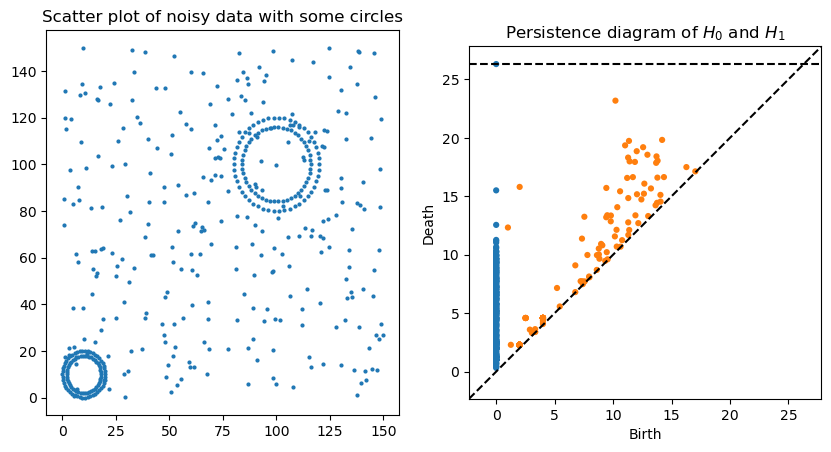

In [4]:
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)),
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

### Persistence Image using just H1 data points

In [6]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

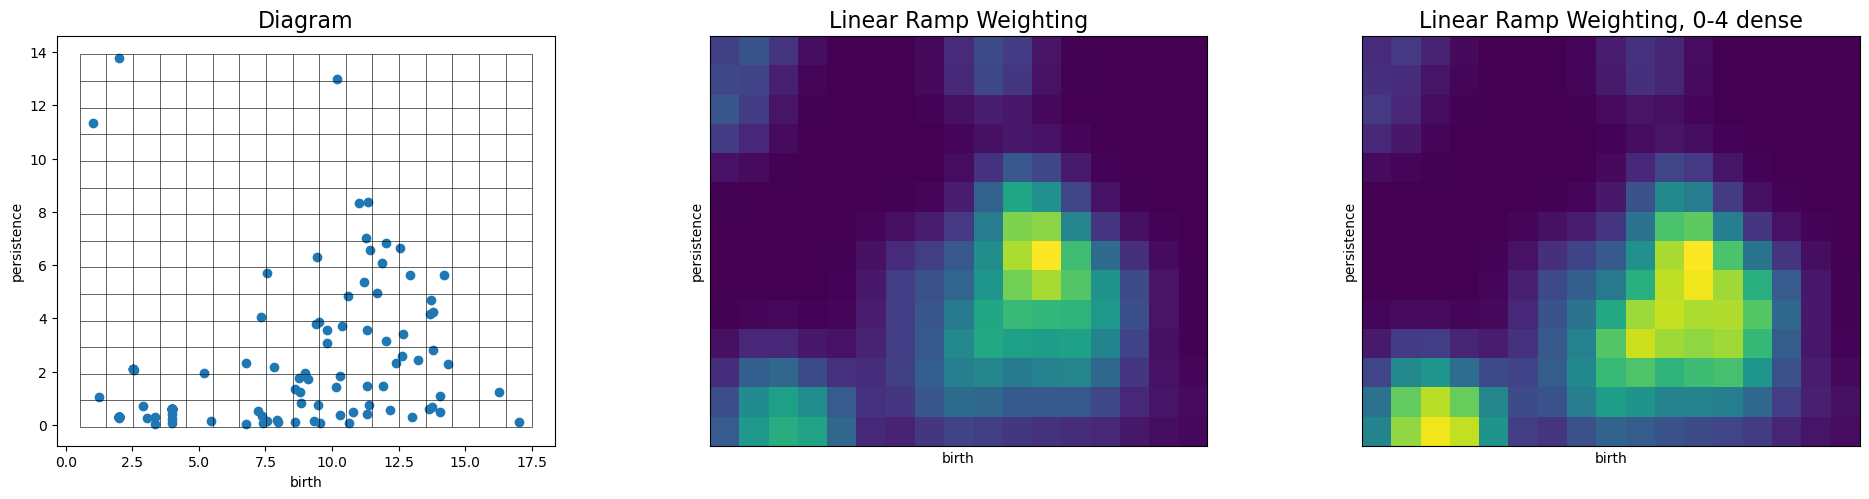

In [7]:
# We first import one of the implemented weighting functions, a peicewise linear ramp
from persim.images_weights import linear_ramp

pimgr.pixel_size = 1
pimgr.weight = linear_ramp
pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':10.0}

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Linear Ramp Weighting', fontsize=16)

pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':4.0}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Linear Ramp Weighting, 0-4 dense', fontsize=16)

plt.tight_layout()
plt.show()

### Persistence Image using just H0 data points

In [35]:
# Remove the Inf last data point from H0_dgm
H0_dgm = H0_dgm[:-1]

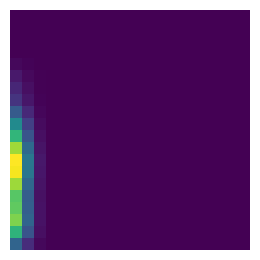

In [36]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

pimgr.pixel_size = 1
pimgr.weight = linear_ramp
pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':20.0}
pimgr.birth_range = (0.0, 20.0)
pimgr.pers_range = (0.0, 20.0)

pimgs = pimgr.transform(H0_dgm)
pimgs = np.rot90(pimgs, k=1) 

plt.figure(figsize=(2.4, 2.4))
plt.imshow(pimgs, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
plt.axis('off')  # Turn off axis
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
plt.show()

### Persistence Image using just H0 data points (making 0-4 dense - Linear ramp)

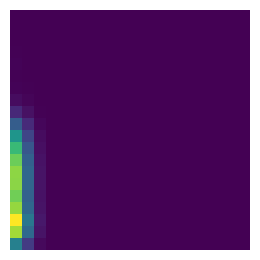

In [8]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

pimgr.pixel_size = 1
pimgr.weight = linear_ramp
pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':4.0}
pimgr.birth_range = (0.0, 20.0)
pimgr.pers_range = (0.0, 20.0)

pimgs = pimgr.transform(H0_dgm)
pimgs = np.rot90(pimgs, k=1) 

plt.figure(figsize=(2.4, 2.4))
plt.imshow(pimgs, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
plt.axis('off')  # Turn off axis
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
plt.show()

### Persistence Image using just H1 data points (making 0-4 dense - Linear ramp)

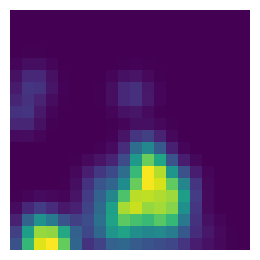

In [10]:
pimgr_1 = PersistenceImager(pixel_size=1)
pimgr_1.fit(H1_dgm)

pimgr_1.pixel_size = 1
pimgr_1.weight = linear_ramp
pimgr_1.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':4.0}
pimgr_1.birth_range = (0.0, 20.0)
pimgr_1.pers_range = (0.0, 20.0)

pimgs_1 = pimgr_1.transform(H1_dgm)
pimgs_1 = np.rot90(pimgs_1, k=1) 

plt.figure(figsize=(2.4, 2.4))
plt.imshow(pimgs_1, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
plt.axis('off')  # Turn off axis
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
plt.show()

### Combining H1 Image and H0 Image and Plotting!

In [11]:
# pigms is the persistence image of H0_dgm and pimgs_1 is the persistence image of H1_dgm
combined = pimgs+pimgs_1

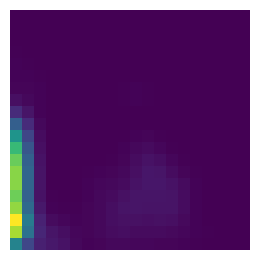

In [12]:
plt.figure(figsize=(2.4, 2.4))
plt.imshow(combined, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
plt.axis('off')  # Turn off axis
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
plt.show()

Still H1 is not visible because H0 Data points are more dense

### This is data manupulation(Just to show the difference)

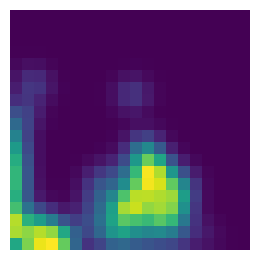

In [17]:
# H1 data points weights are multiplied by 20
combined = pimgs+20*pimgs_1

plt.figure(figsize=(2.4, 2.4))
plt.imshow(combined, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
plt.axis('off')  # Turn off axis
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
plt.show()

Now we can see both H1 and H0 in the same image but H1 matrix values are multiplied by 20!

### Let's check the values in both images

In [18]:
# flatten the images and sort them
pimgs_flattern = pimgs.flatten()
pimgs_1_flattern = pimgs_1.flatten()

pimgs_flattern_sorted = np.sort(pimgs_flattern)
pimgs_1_flattern_sorted = np.sort(pimgs_1_flattern)


In [19]:
pimgs_flattern_sorted

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [20]:
pimgs_1_flattern_sorted

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.11022302e-16, 1.11022302e-16,
       1.11022302e-16, 3.33066907e-16, 6.65803326e-16, 8.88178420e-16,
       1.11022302e-15, 6.55031585e-15, 1.12687637e-14, 3.03090886e-14,
       6.23961176e-14, 9.63673585e-14, 1.08357767e-13, 2.04391728e-13,
       7.02438108e-13, 1.81787918e-12, 2.15827363e-12, 2.98803690e-12,
       3.64872021e-12, 3.66473352e-12, 4.13080681e-12, 4.74265072e-12,
       1.13478481e-11, 1.84646758e-11, 2.29294358e-11, 2.89398734e-11,
       6.84458046e-11, 8.68631584e-11, 1.28609316e-10, 1.52168745e-10,
       1.70265659e-10, 2.63100890e-10, 2.84284263e-10, 3.17012279e-10,
       4.42141503e-10, 4.43555304e-10, 5.85868686e-10, 6.39057030e-10,
       9.83229609e-10, 1.14028953e-09, 1.46758392e-09, 2.06942116e-09,
      

H0 has cosniderably large values because the data points are more dense throughout small region and when we create a gaussian kernel for each point and sum them up, those ares will have significant large values compared to H1 data.